In [1]:
from ztm import *

<Figure size 1800x1200 with 0 Axes>

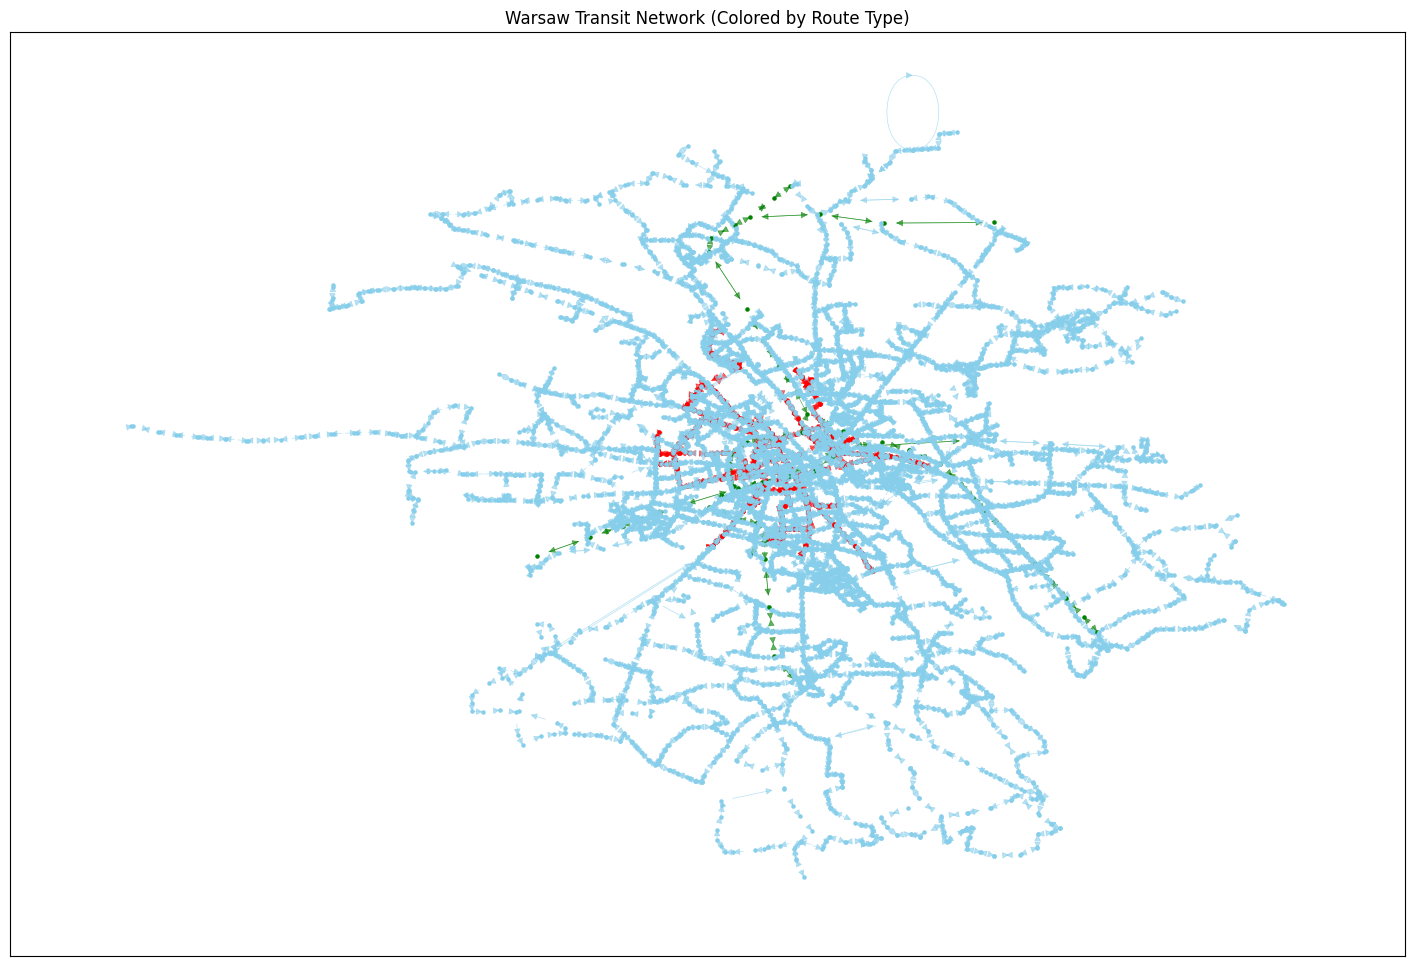

Saved graph for 00:00:00 to 01:00:00 as hourly_city_graphs/graph_00-00-00_to_01-00-00.png


<Figure size 1800x1200 with 0 Axes>

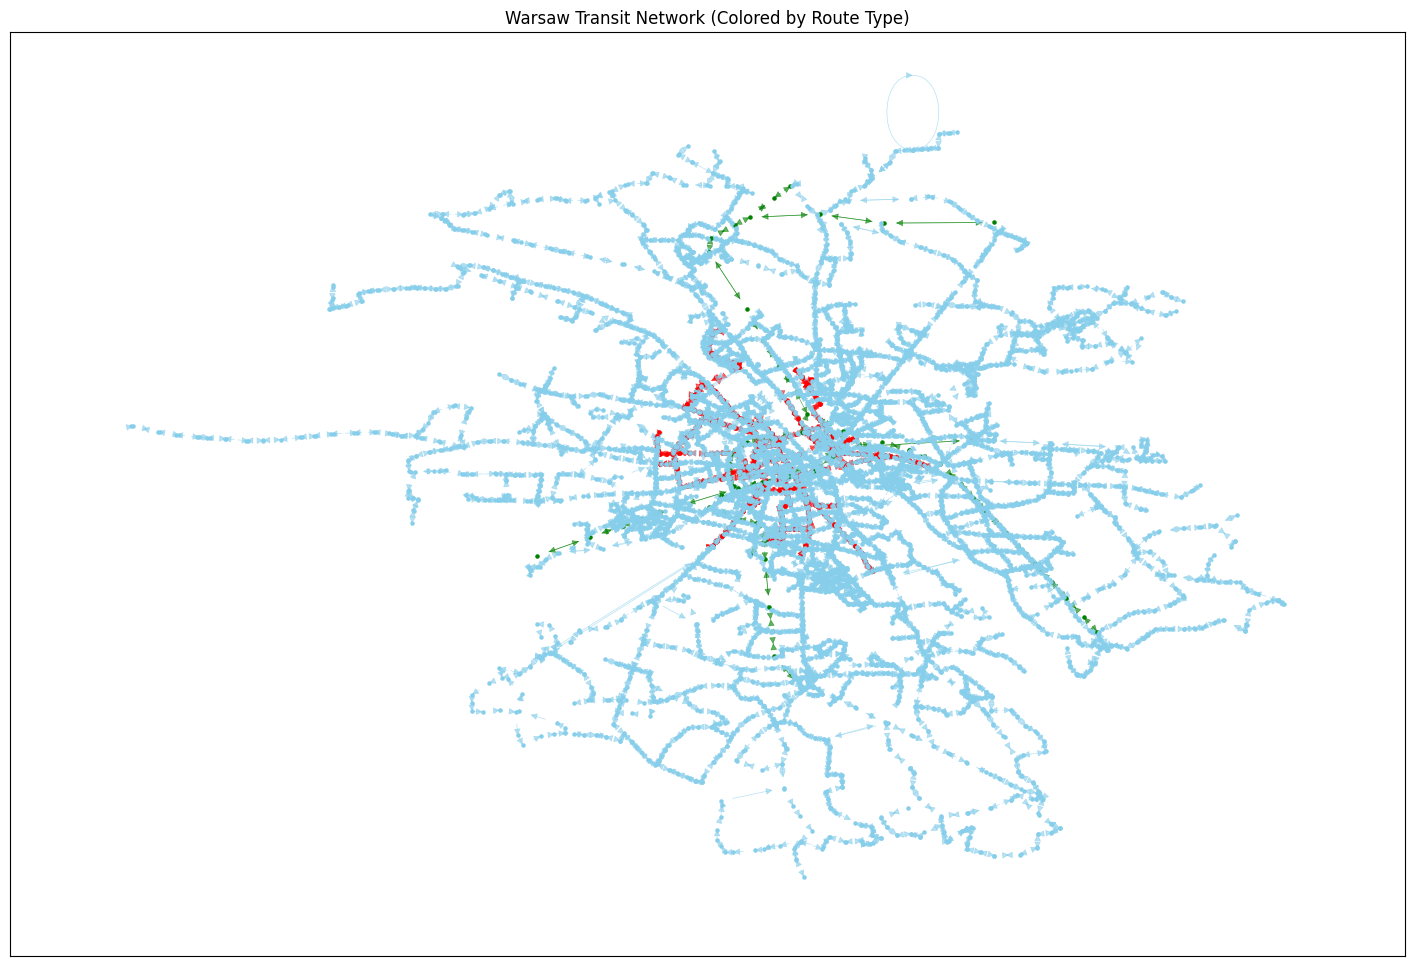

Saved graph for 01:00:00 to 02:00:00 as hourly_city_graphs/graph_01-00-00_to_02-00-00.png


<Figure size 1800x1200 with 0 Axes>

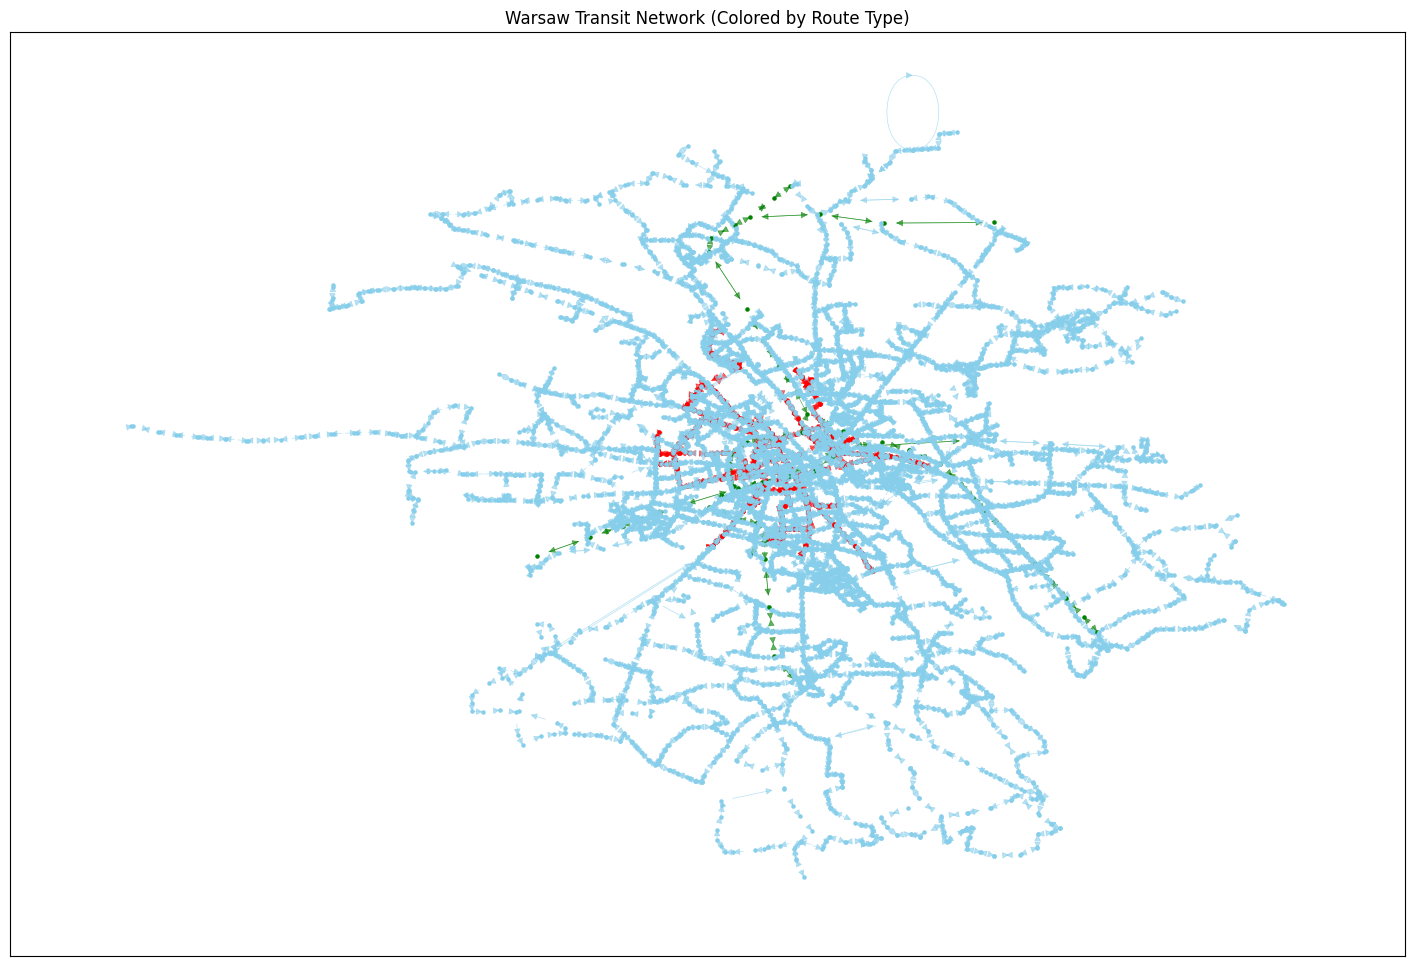

Saved graph for 02:00:00 to 03:00:00 as hourly_city_graphs/graph_02-00-00_to_03-00-00.png


<Figure size 1800x1200 with 0 Axes>

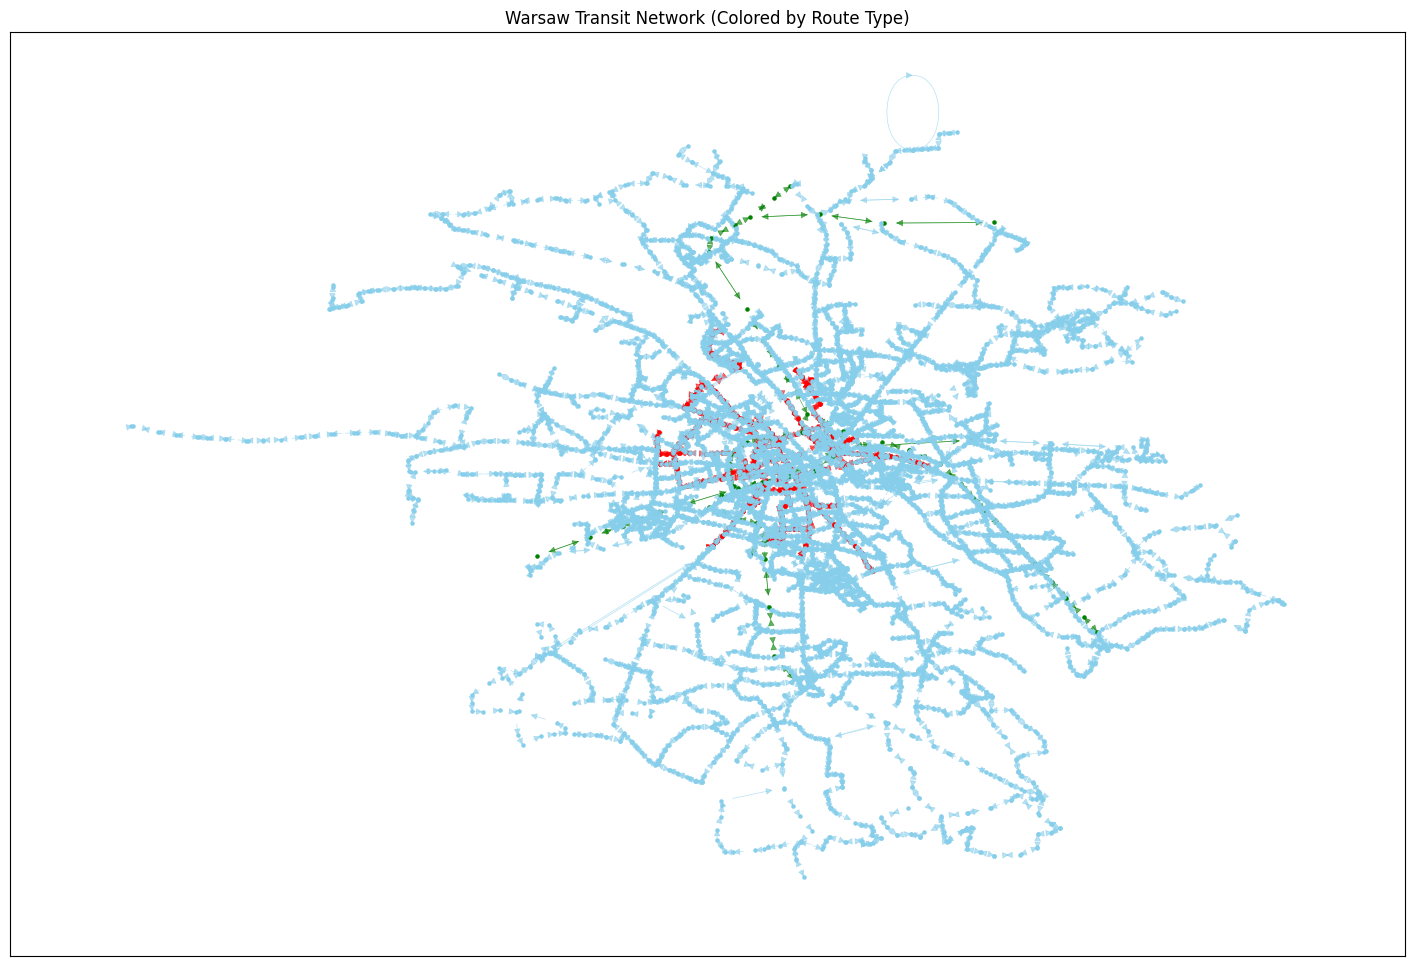

Saved graph for 03:00:00 to 04:00:00 as hourly_city_graphs/graph_03-00-00_to_04-00-00.png


<Figure size 1800x1200 with 0 Axes>

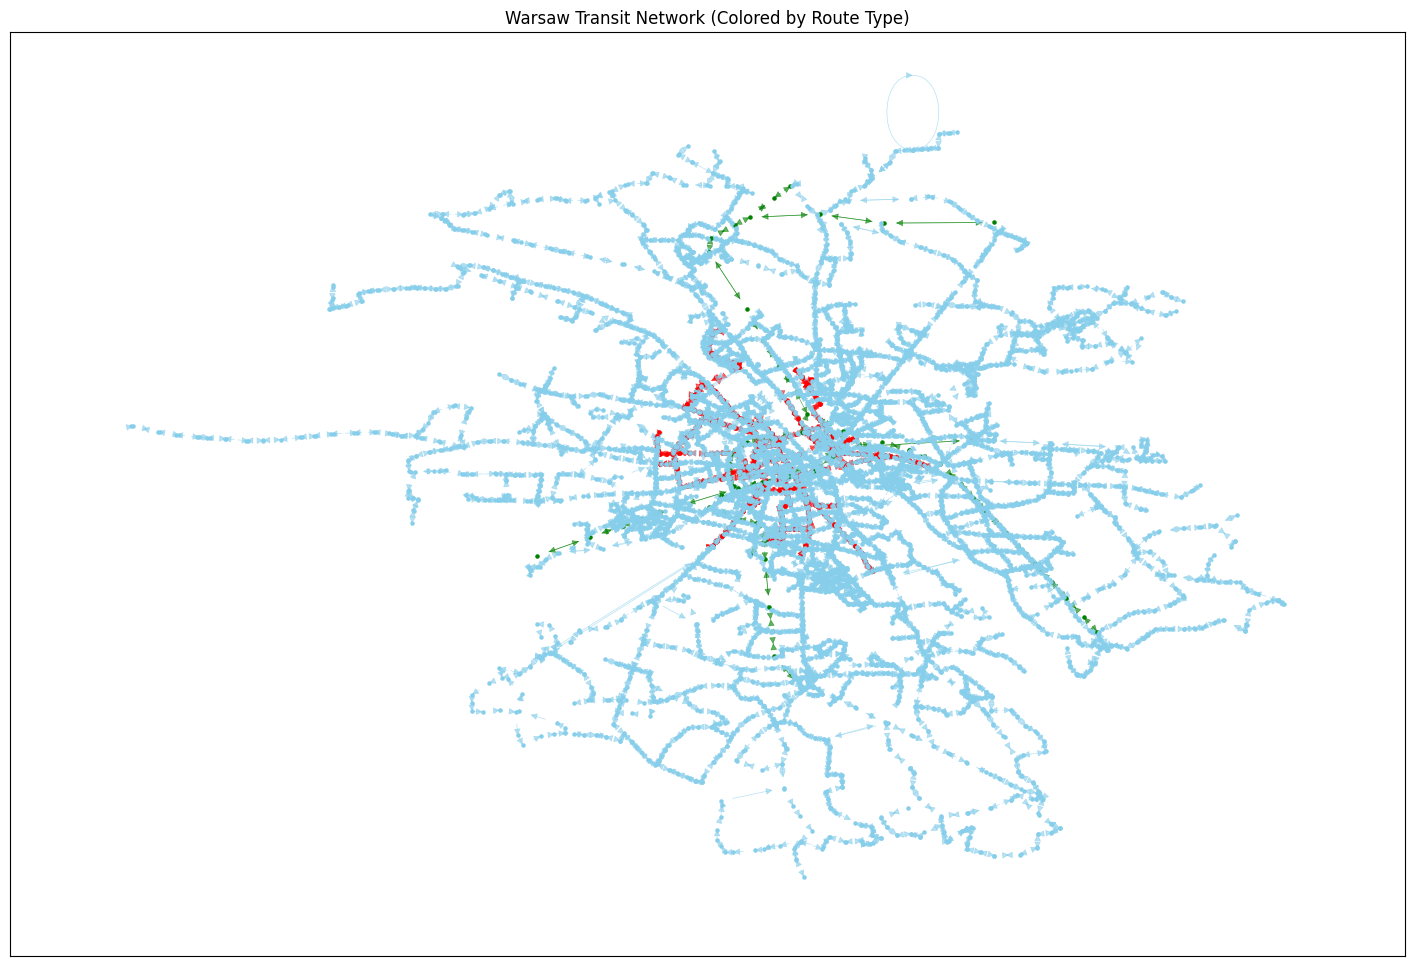

Saved graph for 04:00:00 to 05:00:00 as hourly_city_graphs/graph_04-00-00_to_05-00-00.png


<Figure size 1800x1200 with 0 Axes>

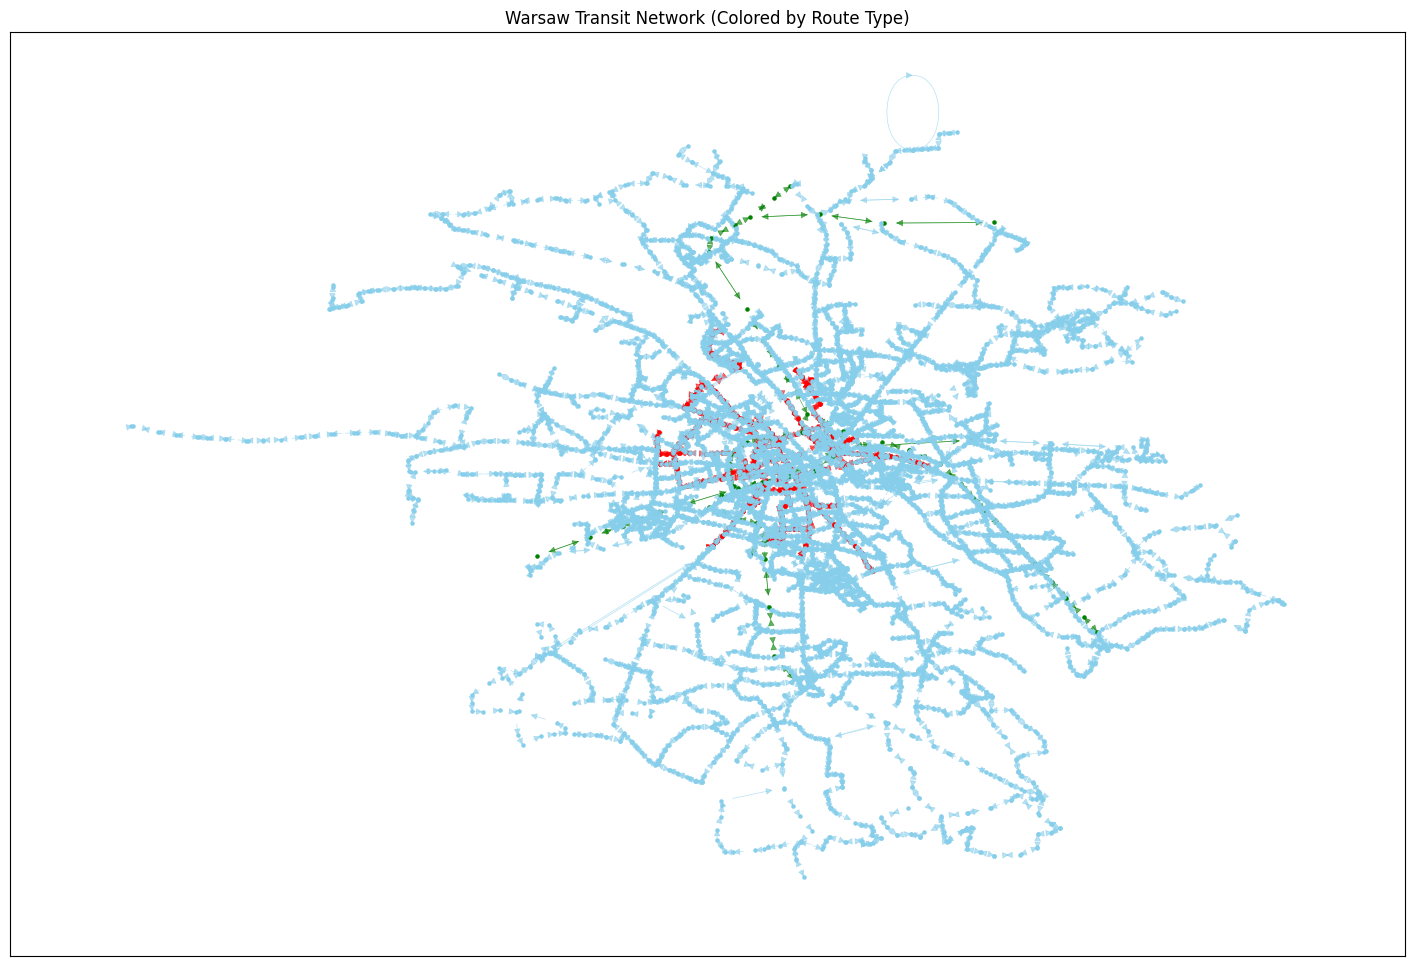

Saved graph for 05:00:00 to 06:00:00 as hourly_city_graphs/graph_05-00-00_to_06-00-00.png


<Figure size 1800x1200 with 0 Axes>

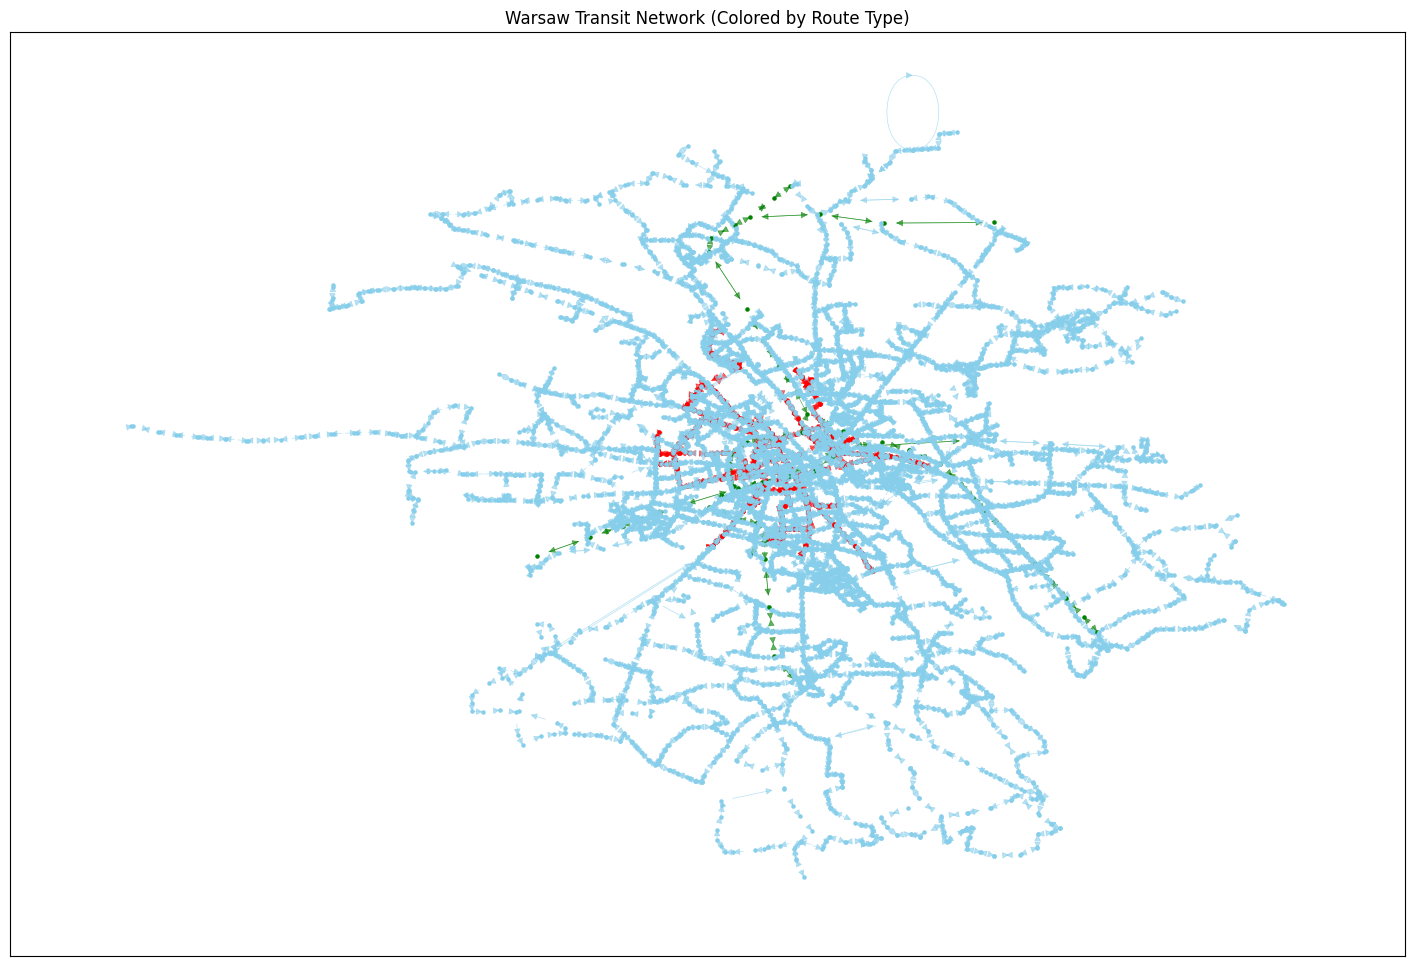

Saved graph for 06:00:00 to 07:00:00 as hourly_city_graphs/graph_06-00-00_to_07-00-00.png


<Figure size 1800x1200 with 0 Axes>

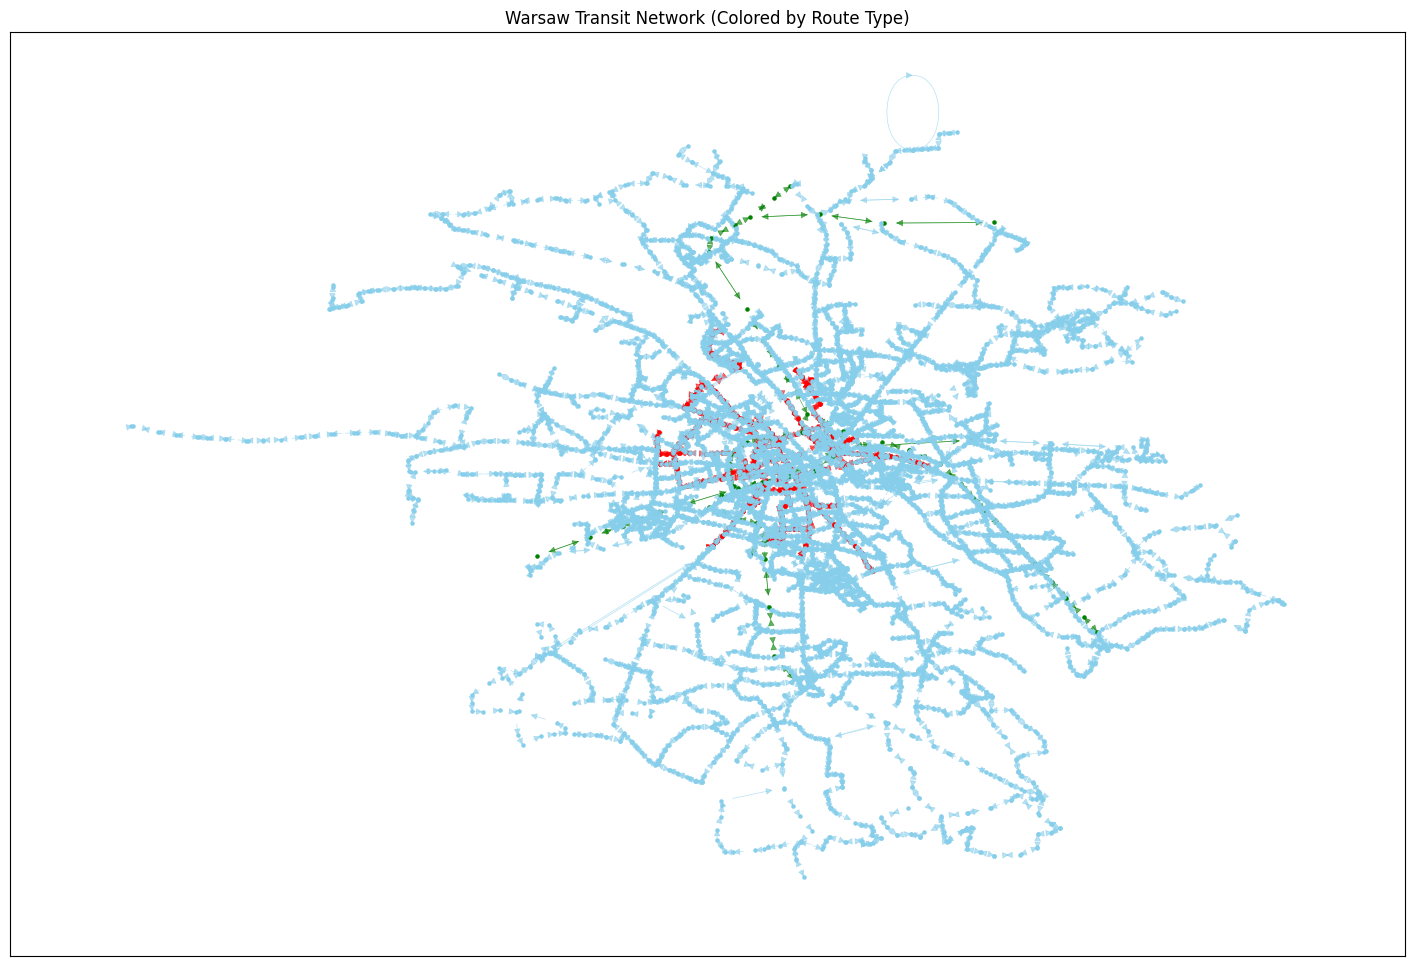

Saved graph for 07:00:00 to 08:00:00 as hourly_city_graphs/graph_07-00-00_to_08-00-00.png


<Figure size 1800x1200 with 0 Axes>

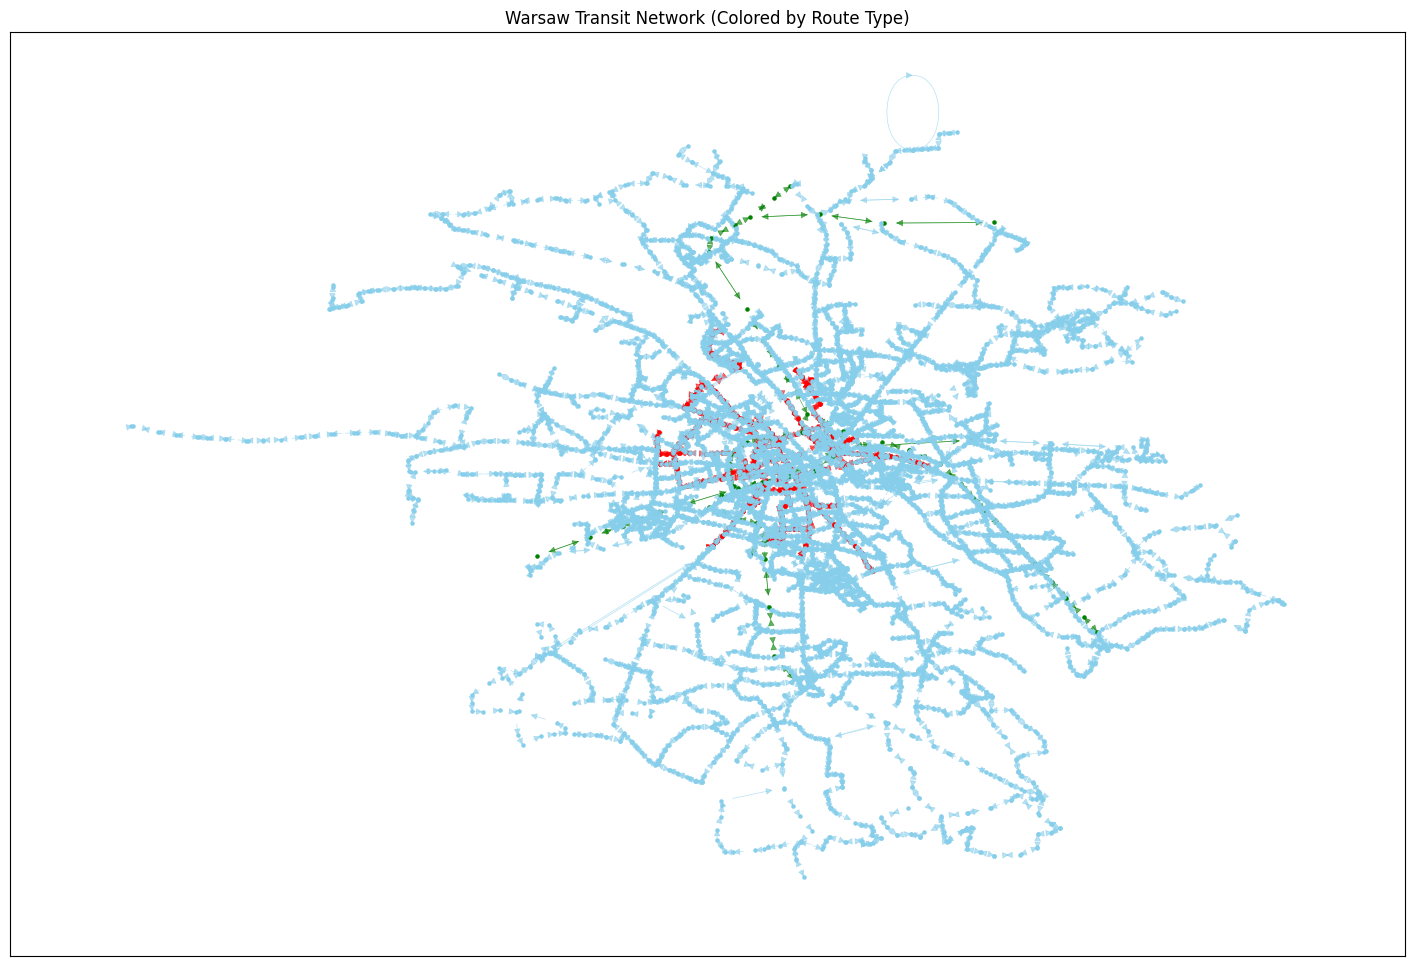

Saved graph for 08:00:00 to 09:00:00 as hourly_city_graphs/graph_08-00-00_to_09-00-00.png


In [ ]:
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt

def generate_hourly_city_graphs(
    stops_file, stop_times_file, trips_file, routes_file, output_dir
):
    stops_dict = parse_stops(stops_file)
    trip_to_route = parse_trips(trips_file)
    route_colors, route_type_map = parse_routes(routes_file)

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    start_time = datetime.strptime("00:00:00", "%H:%M:%S")
    for hour in range(24):
        start = start_time + timedelta(hours=hour)
        end = start + timedelta(hours=1)
        start_str = start.strftime("%H:%M:%S")
        end_str = end.strftime("%H:%M:%S")

        stop_times_df = pd.read_csv(stop_times_file)
        stop_times_df['departure_time'] = stop_times_df['departure_time'].apply(normalize_times)
        stop_times_df = stop_times_df[
            (stop_times_df['departure_time'] >= start_str) &
            (stop_times_df['departure_time'] < end_str)
        ]

        connections, subset_stop_ids = parse_stop_times(stop_times_file, trip_to_route)

        G = build_graph(stops_dict, connections, subset_stop_ids, route_type_map)

        plt.figure(figsize=(18, 12))
        draw_graph(G, geographic=True)

        output_file = os.path.join(output_dir, f"graph_{start_str.replace(':', '-')}_to_{end_str.replace(':', '-')}.png")
        plt.savefig(output_file)
        plt.close()
        print(f"Saved graph for {start_str} to {end_str} as {output_file}")


# Ścieżki do plików danych
stops_file = "stops.txt"
stop_times_file = "stop_times.txt"
trips_file = "trips.txt"
routes_file = "routes.txt"
output_directory = "hourly_city_graphs"

# Generowanie obrazków
generate_hourly_city_graphs(stops_file, stop_times_file, trips_file, routes_file, output_directory)
